In [48]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
df = pd.read_csv('emails.csv')
df1 = df

In [50]:
df1

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


## Data Insights

In [51]:
length = len(df1)
label = df1.Spam.value_counts()
des = df1.describe()


print("The size of the dataset is: ", length)
print("The number of spam emails is: ", label[1])
print("The number of ham emails is: ", label[0])


The size of the dataset is:  5728
The number of spam emails is:  1368
The number of ham emails is:  4360


In [52]:
df1.describe()

,Spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Text(0.5, 1.0, 'Spam vs Non-Spam Distribution')

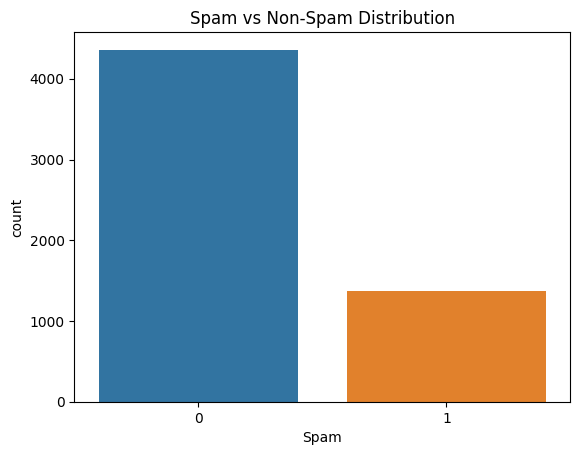

In [53]:
sns.countplot(data=df1, x='Spam').set_title("Spam vs Non-Spam Distribution")

# Building a model to predict the email is spam or not

In [66]:
df1.dropna(inplace=True)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df1['Text'])


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, df1['Spam'], test_size=0.25, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 4296
Testing set size: 1432


In [68]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9888268156424581


In [70]:
def predict_spam(email: str, classifier, vectorizer) -> str:
    email_processed = vectorizer.transform([email])
    prediction = classifier.predict(email_processed)
    
    if prediction == 0:
        return "The email is not spam."
    else:
        return "The email is spam."

new_email = """Make it Personal with a Website
Simple. Easy-to-use. Stunning. Creating a personal website has never been more fun.

Dont take our word for it; heres what our friend Harsha G. has to say:
“For my personal brand, this feels like it could be the hub of so many other spokes that come.”

Get started for free, or upgrade to Premium for exclusive templates, a free custom domain for the first year*, and more.


Build my website
Inspiration for your website"""

result = predict_spam(new_email, nb_classifier, vectorizer)
print(result)


The email is spam.
